In [1]:
#pip install mlxtend

In [2]:
#pip install xgboost

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
sns.set(color_codes=True) # adds a nice background to the graphs
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pks_df = pd.read_csv("dataset/parkinsons.csv")


In [6]:
pks_df.head()


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [7]:
pks_df.shape


(195, 24)

In [8]:
pks_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [9]:
pks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
pks_df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [11]:
pks_df[pks_df.duplicated()]

Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 24 columns]

In [12]:
Target = pks_df["status"]

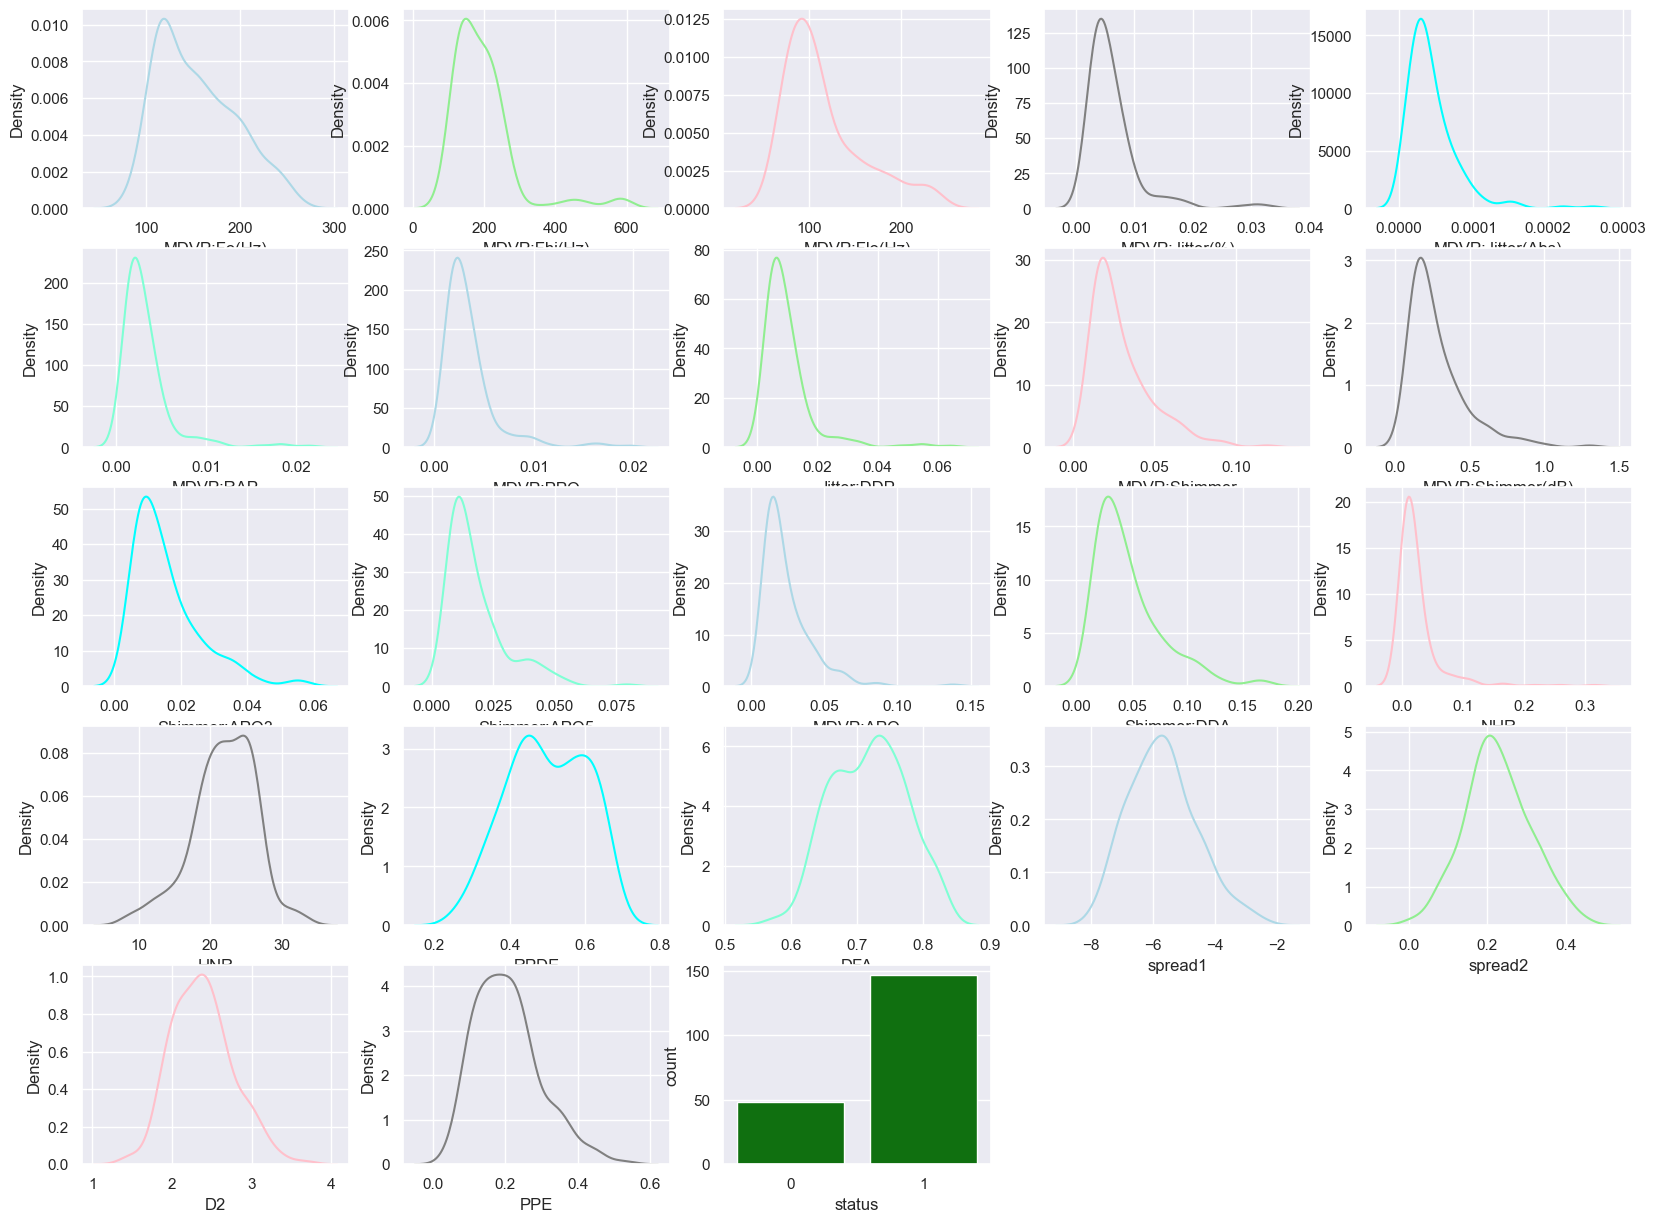

In [13]:
plt.figure(figsize= (20,15))
plt.subplot(5,5,1)
sns.distplot(pks_df["MDVP:Fo(Hz)"],hist=False,kde=True, color='lightblue')
plt.xlabel('MDVP:Fo(Hz)')

plt.subplot(5,5,2)
sns.distplot(pks_df["MDVP:Fhi(Hz)"],hist=False,kde=True, color='lightgreen')
plt.xlabel('MDVP:Fhi(Hz)')

plt.subplot(5,5,3)
sns.distplot(pks_df["MDVP:Flo(Hz)"],hist=False,kde=True, color='pink')
plt.xlabel('MDVP:Flo(Hz)')

plt.subplot(5,5,4)
sns.distplot(pks_df["MDVP:Jitter(%)"],hist=False,kde=True, color='gray')
plt.xlabel('MDVP:Jitter(%)')

plt.subplot(5,5,5)
sns.distplot(pks_df["MDVP:Jitter(Abs)"],hist=False,kde=True, color='cyan')
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(5,5,6)
sns.distplot(pks_df["MDVP:RAP"],hist=False,kde=True, color='Aquamarine')
plt.xlabel('MDVP:RAP')

plt.subplot(5,5,7)
sns.distplot(pks_df["MDVP:PPQ"],hist=False,kde=True, color='lightblue')
plt.xlabel('MDVP:PPQ')

plt.subplot(5,5,8)
sns.distplot(pks_df["Jitter:DDP"],hist=False,kde=True, color='lightgreen')
plt.xlabel('Jitter:DDP')

plt.subplot(5,5,9)
sns.distplot(pks_df["MDVP:Shimmer"],hist=False,kde=True, color='pink')
plt.xlabel('MDVP:Shimmer')

plt.subplot(5,5,10)
sns.distplot(pks_df["MDVP:Shimmer(dB)"],hist=False,kde=True, color='gray')
plt.xlabel('MDVP:Shimmer(dB)')

plt.subplot(5,5,11)
sns.distplot(pks_df["Shimmer:APQ3"],hist=False,kde=True, color='cyan')
plt.xlabel('Shimmer:APQ3')

plt.subplot(5,5,12)
sns.distplot(pks_df["Shimmer:APQ5"],hist=False,kde=True, color='Aquamarine')
plt.xlabel('Shimmer:APQ5')

plt.subplot(5,5,13)
sns.distplot(pks_df["MDVP:APQ"],hist=False,kde=True, color='lightblue')
plt.xlabel('MDVP:APQ')

plt.subplot(5,5,14)
sns.distplot(pks_df["Shimmer:DDA"],hist=False,kde=True, color='lightgreen')
plt.xlabel('Shimmer:DDA')

plt.subplot(5,5,15)
sns.distplot(pks_df["NHR"],hist=False,kde=True, color='pink')
plt.xlabel('NHR')

plt.subplot(5,5,16)
sns.distplot(pks_df["HNR"],hist=False,kde=True, color='gray')
plt.xlabel('HNR')

plt.subplot(5,5,17)
sns.distplot(pks_df["RPDE"],hist=False,kde=True, color='cyan')
plt.xlabel('RPDE')

plt.subplot(5,5,18)
sns.distplot(pks_df["DFA"],hist=False,kde=True, color='Aquamarine')
plt.xlabel('DFA')

plt.subplot(5,5,19)
sns.distplot(pks_df["spread1"],hist=False,kde=True, color='lightblue')
plt.xlabel('spread1')

plt.subplot(5,5,20)
sns.distplot(pks_df["spread2"],hist=False,kde=True, color='lightgreen')
plt.xlabel('spread2')

plt.subplot(5,5,21)
sns.distplot(pks_df["D2"],hist=False,kde=True, color='pink')
plt.xlabel('D2')

plt.subplot(5,5,22)
sns.distplot(pks_df["PPE"],hist=False,kde=True, color='gray')
plt.xlabel('PPE')


plt.subplot(5,5,23)
sns.countplot(pks_df["status"], color='Green')
plt.xlabel('status')


plt.show()

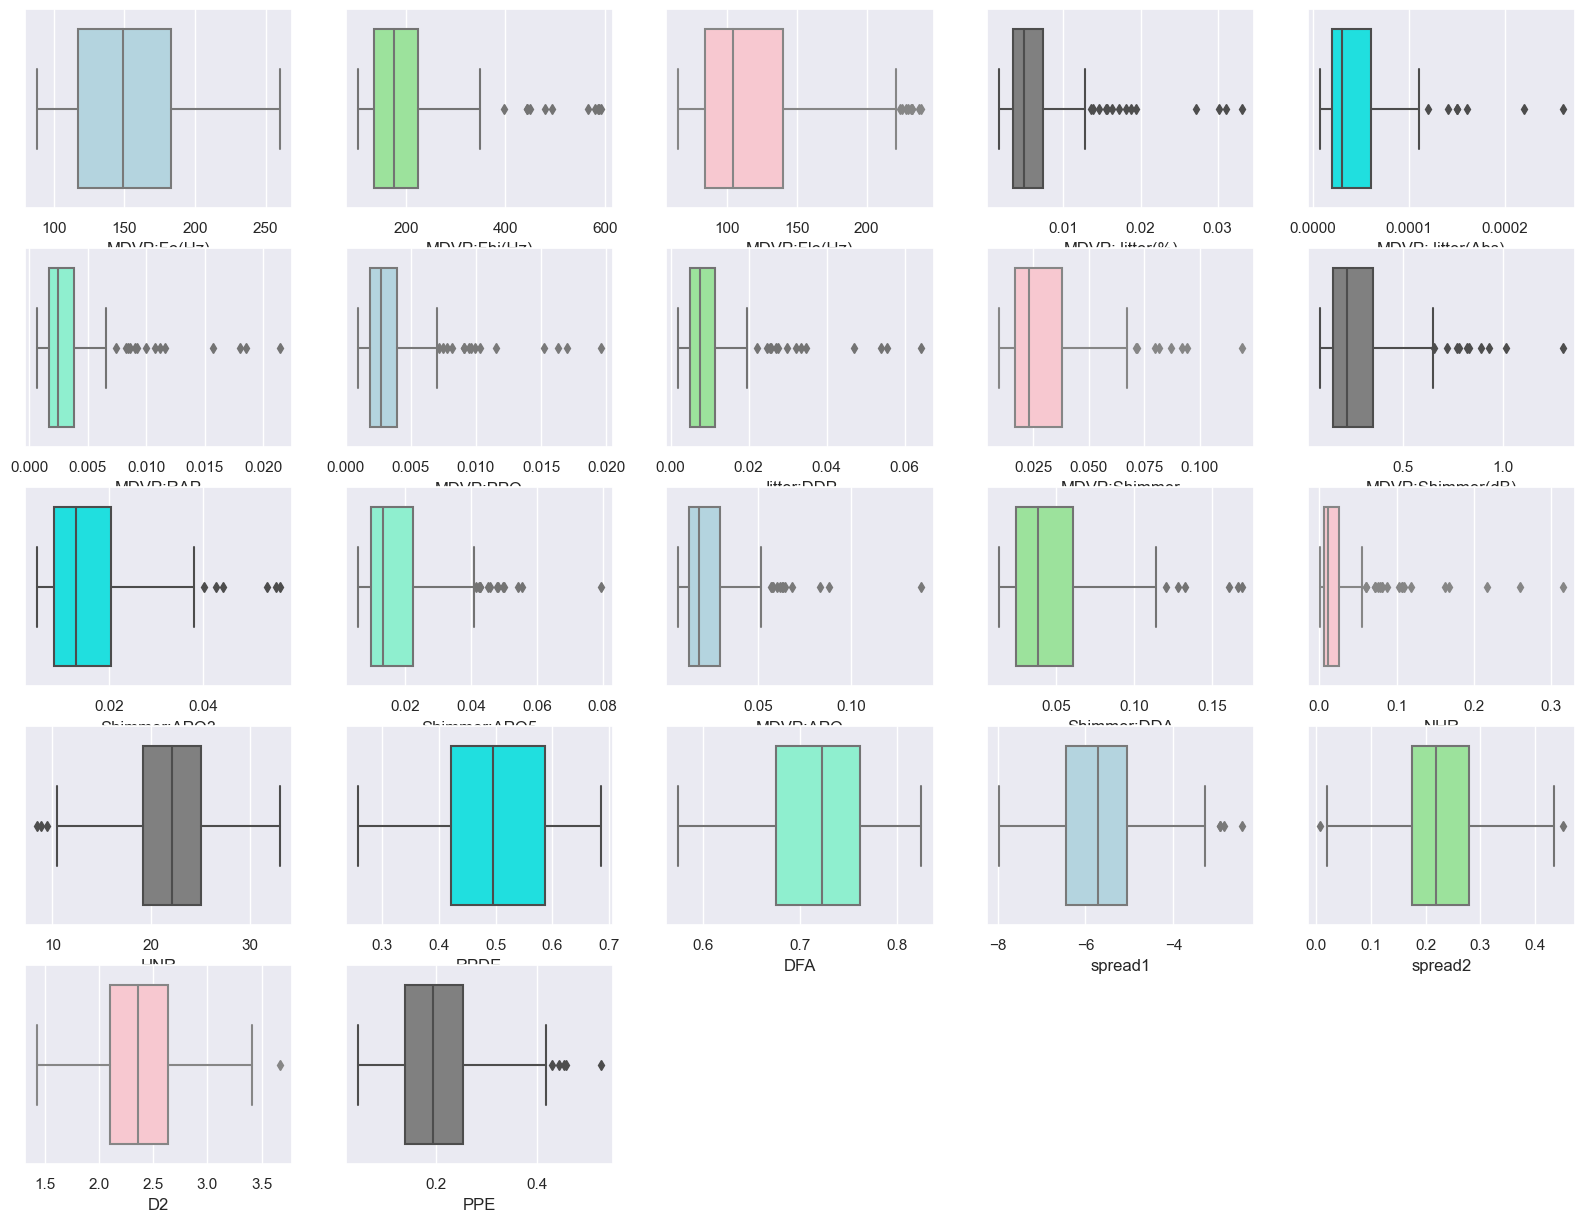

In [14]:
 plt.figure(figsize= (20,15))
plt.subplot(5,5,1)
sns.boxplot(pks_df["MDVP:Fo(Hz)"],orient="v", color='lightblue')
plt.xlabel('MDVP:Fo(Hz)')

plt.subplot(5,5,2)
sns.boxplot(pks_df["MDVP:Fhi(Hz)"],orient="v", color='lightgreen')
plt.xlabel('MDVP:Fhi(Hz)')

plt.subplot(5,5,3)
sns.boxplot(pks_df["MDVP:Flo(Hz)"], orient="v",color='pink')
plt.xlabel('MDVP:Flo(Hz)')

plt.subplot(5,5,4)
sns.boxplot(pks_df["MDVP:Jitter(%)"],orient="v", color='gray')
plt.xlabel('MDVP:Jitter(%)')

plt.subplot(5,5,5)
sns.boxplot(pks_df["MDVP:Jitter(Abs)"],orient="v", color='cyan')
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(5,5,6)
sns.boxplot(pks_df["MDVP:RAP"],orient="v", color='Aquamarine')
plt.xlabel('MDVP:RAP')

plt.subplot(5,5,7)
sns.boxplot(pks_df["MDVP:PPQ"],orient="v", color='lightblue')
plt.xlabel('MDVP:PPQ')

plt.subplot(5,5,8)
sns.boxplot(pks_df["Jitter:DDP"],orient="v", color='lightgreen')
plt.xlabel('Jitter:DDP')

plt.subplot(5,5,9)
sns.boxplot(pks_df["MDVP:Shimmer"],orient="v", color='pink')
plt.xlabel('MDVP:Shimmer')

plt.subplot(5,5,10)
sns.boxplot(pks_df["MDVP:Shimmer(dB)"],orient="v", color='gray')
plt.xlabel('MDVP:Shimmer(dB)')

plt.subplot(5,5,11)
sns.boxplot(pks_df["Shimmer:APQ3"],orient="v", color='cyan')
plt.xlabel('Shimmer:APQ3')

plt.subplot(5,5,12)
sns.boxplot(pks_df["Shimmer:APQ5"],orient="v", color='Aquamarine')
plt.xlabel('Shimmer:APQ5')

plt.subplot(5,5,13)
sns.boxplot(pks_df["MDVP:APQ"],orient="v", color='lightblue')
plt.xlabel('MDVP:APQ')

plt.subplot(5,5,14)
sns.boxplot(pks_df["Shimmer:DDA"],orient="v", color='lightgreen')
plt.xlabel('Shimmer:DDA')

plt.subplot(5,5,15)
sns.boxplot(pks_df["NHR"],orient="v", color='pink')
plt.xlabel('NHR')

plt.subplot(5,5,16)
sns.boxplot(pks_df["HNR"],orient="v", color='gray')
plt.xlabel('HNR')

plt.subplot(5,5,17)
sns.boxplot(pks_df["RPDE"],orient="v", color='cyan')
plt.xlabel('RPDE')

plt.subplot(5,5,18)
sns.boxplot(pks_df["DFA"],orient="v", color='Aquamarine')
plt.xlabel('DFA')

plt.subplot(5,5,19)
sns.boxplot(pks_df["spread1"],orient="v", color='lightblue')
plt.xlabel('spread1')

plt.subplot(5,5,20)
sns.boxplot(pks_df["spread2"],orient="v", color='lightgreen')
plt.xlabel('spread2')

plt.subplot(5,5,21)
sns.boxplot(pks_df["D2"],orient="v", color='pink')
plt.xlabel('D2')

plt.subplot(5,5,22)
sns.boxplot(pks_df["PPE"],orient="v", color='gray')
plt.xlabel('PPE')



plt.show()

In [15]:
pks_df.skew()


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

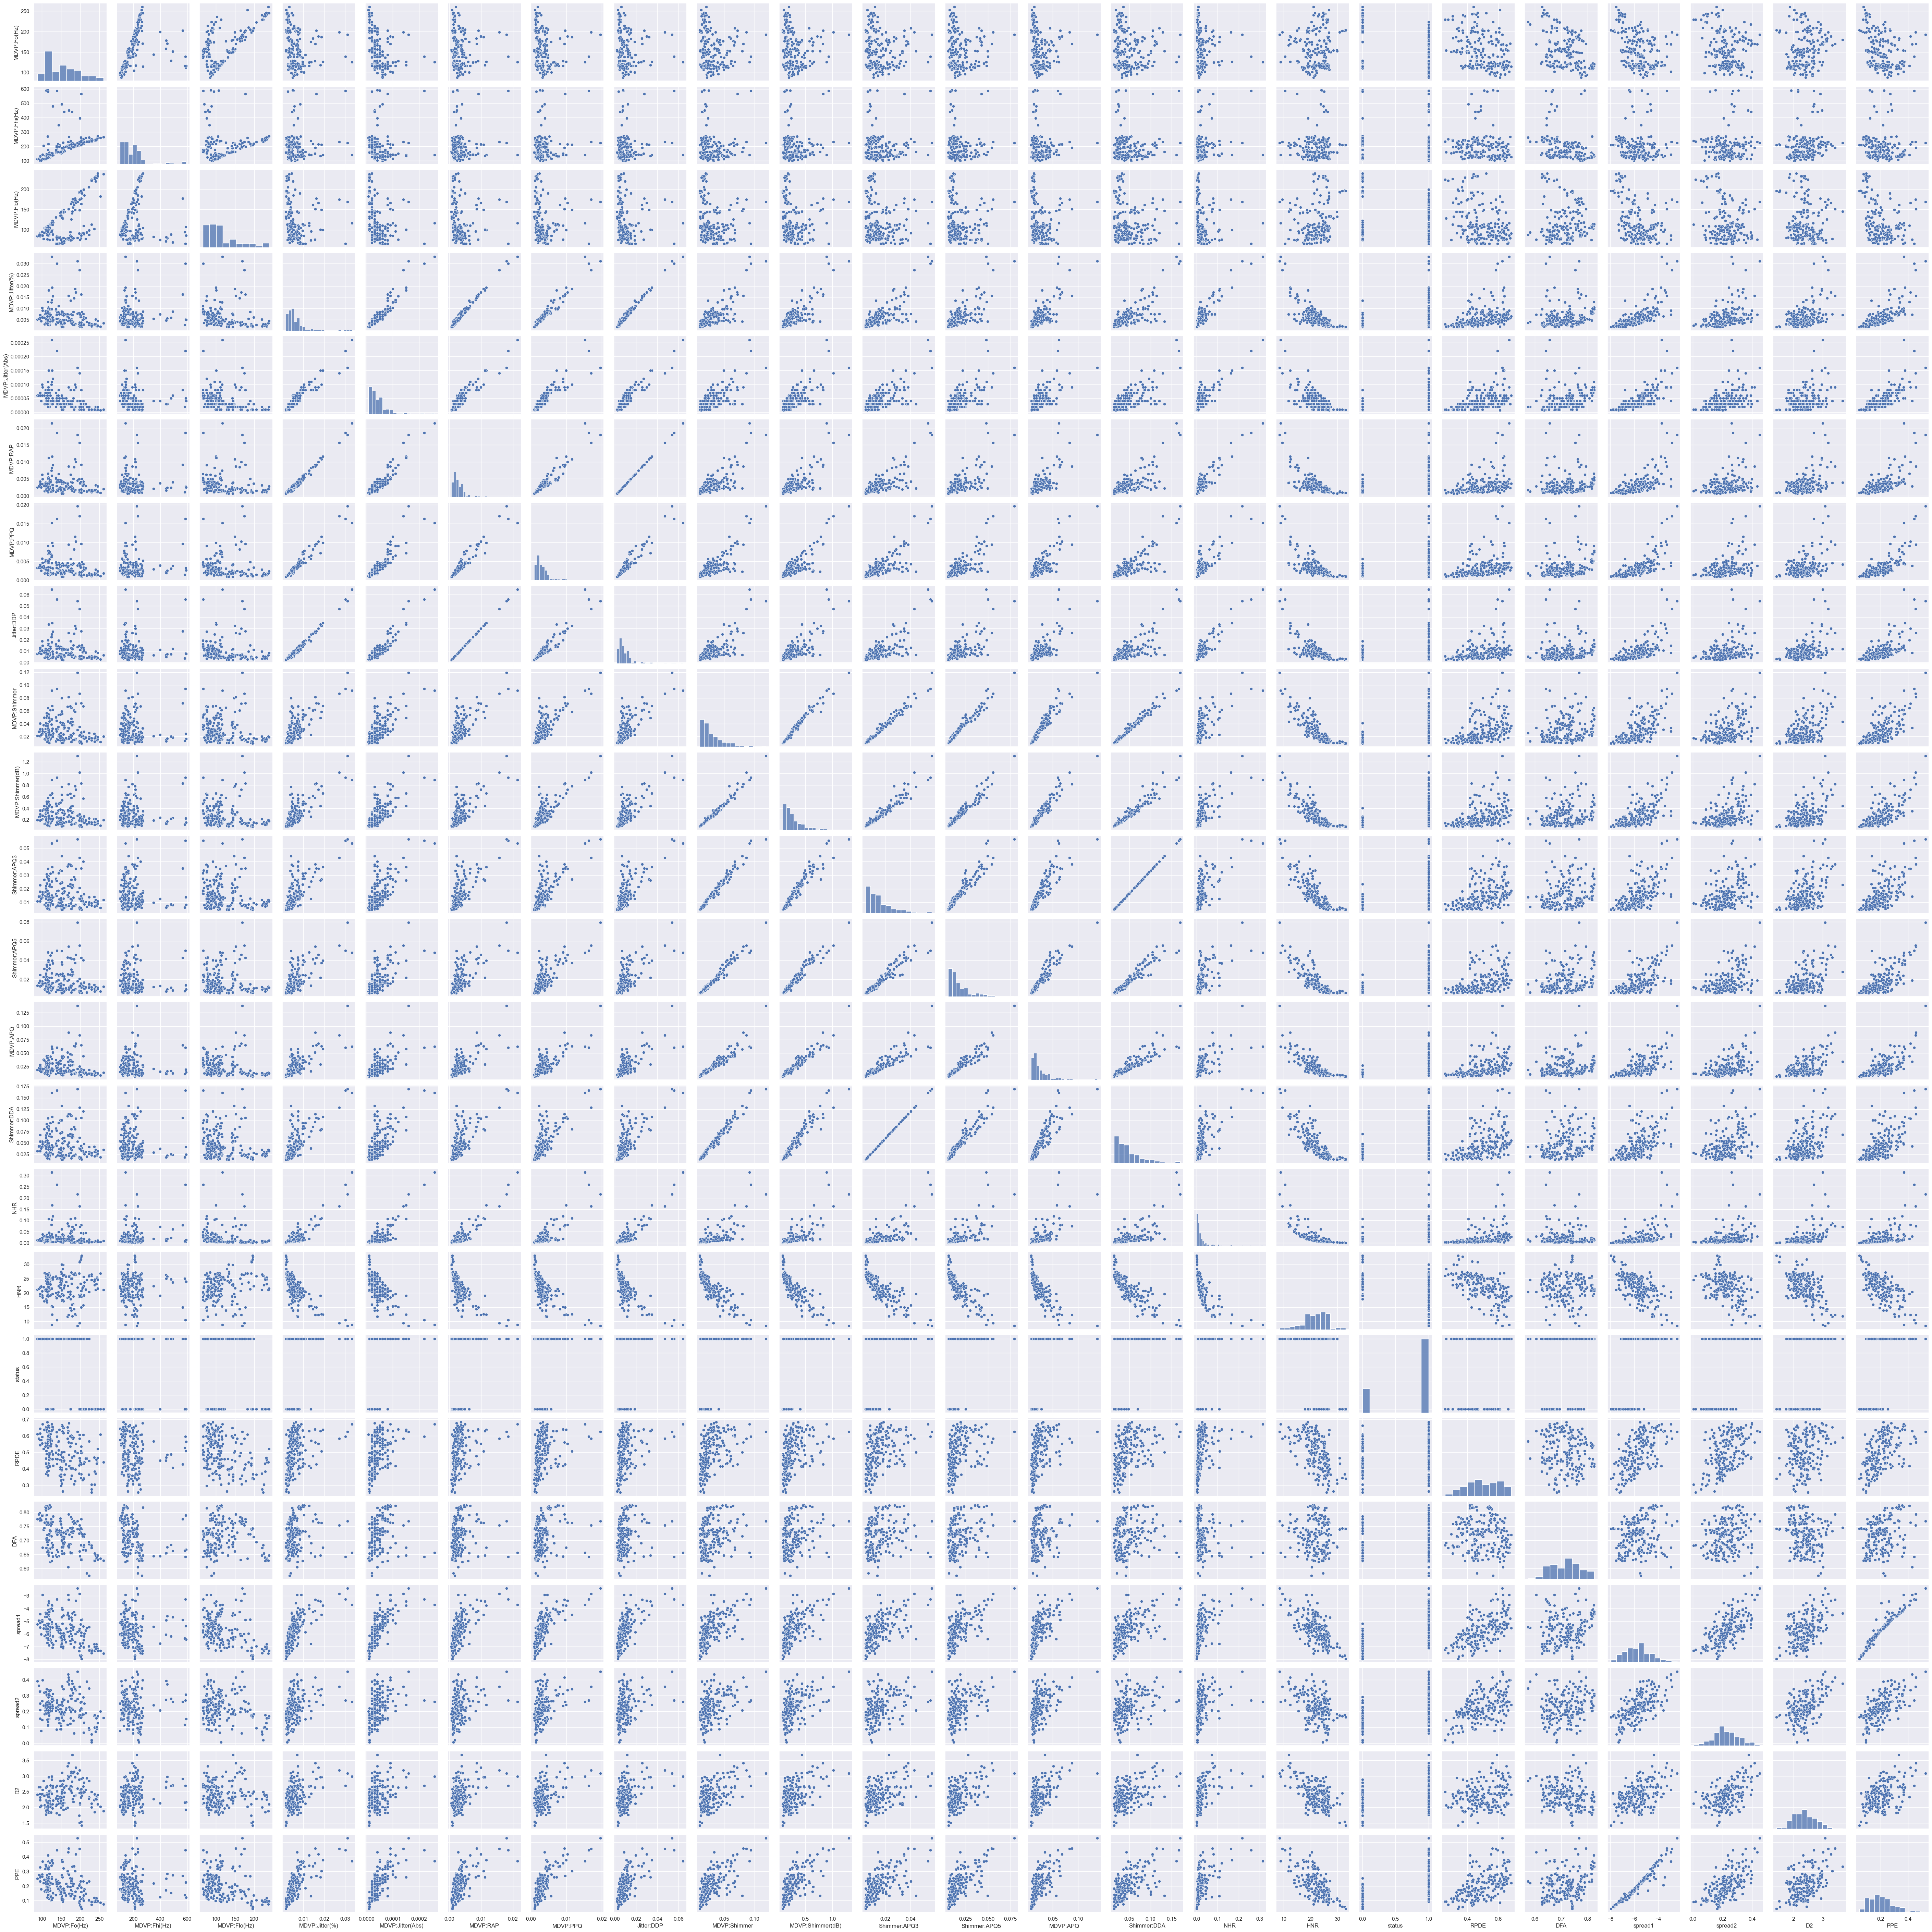

In [16]:
sns.pairplot(pks_df)  #pairplot
plt.show()

In [17]:
pks_df.corr()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

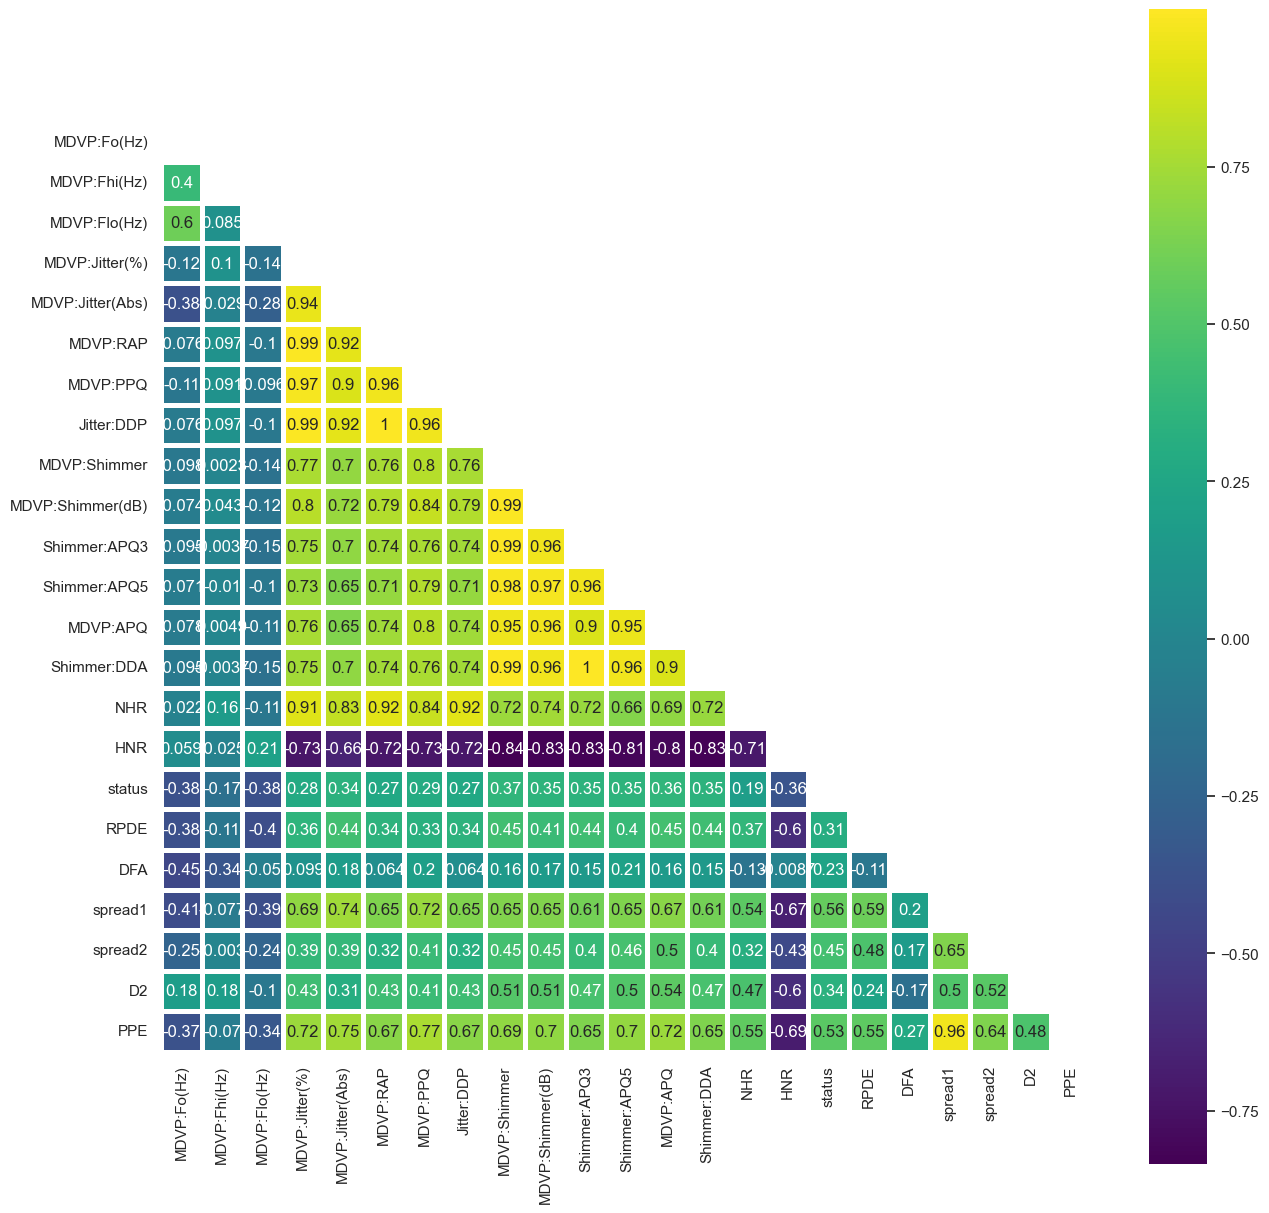

In [18]:
corr = pks_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

In [19]:
print("number of parkinson people in the dataset ",len(pks_df.loc[pks_df["status"]==1]))
print("number of Healthy people in the dataset ",len(pks_df.loc[pks_df["status"]==0]))


number of parkinson people in the dataset  147
number of Healthy people in the dataset  48


In [20]:
updated_cols = list(pks_df.columns)
updated_cols.remove('name')
updated_cols.remove('status')
for column in updated_cols:
    print(column," : ", len(pks_df.loc[pks_df[column]<0]))


MDVP:Fo(Hz)  :  0
MDVP:Fhi(Hz)  :  0
MDVP:Flo(Hz)  :  0
MDVP:Jitter(%)  :  0
MDVP:Jitter(Abs)  :  0
MDVP:RAP  :  0
MDVP:PPQ  :  0
Jitter:DDP  :  0
MDVP:Shimmer  :  0
MDVP:Shimmer(dB)  :  0
Shimmer:APQ3  :  0
Shimmer:APQ5  :  0
MDVP:APQ  :  0
Shimmer:DDA  :  0
NHR  :  0
HNR  :  0
RPDE  :  0
DFA  :  0
spread1  :  195
spread2  :  0
D2  :  0
PPE  :  0


In [21]:
pks_df["spread1"]

0     -4.813031
1     -4.075192
2     -4.443179
3     -4.117501
4     -3.747787
         ...   
190   -6.538586
191   -6.195325
192   -6.787197
193   -6.744577
194   -5.724056
Name: spread1, Length: 195, dtype: float64

In [22]:
def outliearTreat(df):
    cols = list(df.columns)
    cols.remove('name')
    cols.remove('status')
    for columnName in cols:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        whisker = Q1 + 1.5 * IQR
        LowerBound = Q1- 1.5 * IQR
        df[columnName] = df[columnName].apply(lambda x : whisker if x>whisker else x)
        df[columnName] = df[columnName].apply(lambda x : LowerBound if x<LowerBound else x)
    return df

In [23]:
outliearTreat(pks_df)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997        0.007840   
1    phon_R01_S01_2      122.400       148.650       113.819        0.009317   
2    phon_R01_S01_3      116.682       131.111       111.555        0.009317   
3    phon_R01_S01_4      116.676       137.871       111.366        0.009317   
4    phon_R01_S01_5      116.014       141.781       110.655        0.009317   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261        0.004590   
191  phon_R01_S50_3      209.516       253.017        89.488        0.005640   
192  phon_R01_S50_4      174.688       240.005        74.287        0.009317   
193  phon_R01_S50_5      198.764       268.877        74.904        0.007400   
194  phon_R01_S50_6      214.289       260.277        77.973        0.005670   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007  0.003700  0.005003    0.011090      0.043740  ...   
1             0.00008  0.004650  0.005003    0.013940      0.048575  ...   
2             0.00008  0.004922  0.005003    0.014765      0.048575  ...   
3             0.00008  0.004922  0.005003    0.014765      0.048575  ...   
4             0.00008  0.004922  0.005003    0.014765      0.048575  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003  0.002630  0.002590    0.007900      0.040870  ...   
191           0.00003  0.003310  0.002920    0.009940      0.027510  ...   
192           0.00008  0.004922  0.005003    0.014765      0.023080  ...   
193           0.00004  0.003700  0.003900    0.011090      0.022960  ...   
194           0.00003  0.002950  0.003170    0.008850      0.018840  ...   

     Shimmer:DDA       NHR     HNR  status      RPDE       DFA   spread1  \
0       0.065450  0.022110  21.033       1  0.414783  0.805443 -4.813031   
1       0.078825  0.019290  19.085       1  0.458359  0.805443 -4.344240   
2       0.078825  0.013090  20.651       1  0.429895  0.805443 -4.443179   
3       0.078825  0.013530  20.644       1  0.434969  0.805443 -4.344240   
4       0.078825  0.017670  19.649       1  0.417356  0.805443 -4.344240   
..           ...       ...     ...     ...       ...       ...       ...   
190     0.070080  0.027640  19.517       0  0.448439  0.657899 -6.538586   
191     0.048120  0.018100  19.147       0  0.431674  0.683244 -6.195325   
192     0.038040  0.035498  17.883       0  0.407567  0.655683 -6.787197   
193     0.037940  0.035498  19.020       0  0.451221  0.643956 -6.744577   
194     0.030780  0.035498  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.331676  2.486855  0.310744  
2    0.311173  2.342259  0.310744  
3    0.331676  2.405554  0.310744  
4    0.234513  2.332180  0.310744  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [26]:
def standardScalar(df):
    cols = list(df.columns)
    cols.remove('name')
    cols.remove('status')
    # the scaler object (model)
    scalar = StandardScaler()
    for columnName in cols:
        # fit and transform the data
        df[columnName] = scalar.fit_transform(df[[columnName]])
    return df

In [27]:
standardScalar(pks_df)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1    -0.859692     -0.514664     -1.103217        1.074171   
1    phon_R01_S01_2    -0.795593     -0.687850      0.079021        1.715067   
2    phon_R01_S01_3    -0.947802     -1.038926      0.010075        1.715067   
3    phon_R01_S01_4    -0.947962     -0.903612      0.004320        1.715067   
4    phon_R01_S01_5    -0.965584     -0.825346     -0.017332        1.715067   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2     0.582970      0.960100     -0.516575       -0.335583   
191  phon_R01_S50_3     1.523378      1.401252     -0.661926        0.119876   
192  phon_R01_S50_4     0.596280      1.140792     -1.124839        1.715067   
193  phon_R01_S50_5     1.237167      1.718720     -1.106050        0.883312   
194  phon_R01_S50_6     1.650432      1.546574     -1.012590        0.132889   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0            1.356726  0.731750  1.658098    0.729321      1.302062  ...   
1            1.806049  1.467532  1.658098    1.465384      1.679786  ...   
2            1.806049  1.678585  1.658098    1.678455      1.679786  ...   
3            1.806049  1.678585  1.658098    1.678455      1.679786  ...   
4            1.806049  1.678585  1.658098    1.678455      1.679786  ...   
..                ...       ...       ...         ...           ...  ...   
190         -0.440567 -0.096972 -0.265554   -0.094552      1.077850  ...   
191         -0.440567  0.429692 -0.002423    0.432314      0.034130  ...   
192          1.806049  1.678585  1.658098    1.678455     -0.311954  ...   
193          0.008756  0.731750  0.778999    0.729321     -0.321329  ...   
194         -0.440567  0.150870  0.196919    0.150802     -0.643195  ...   

     Shimmer:DDA       NHR       HNR  status      RPDE       DFA   spread1  \
0       1.061449  0.547121 -0.183335       1 -0.808265  1.649775  1.002565   
1       1.692591  0.302907 -0.655254       1 -0.387156  1.649775  1.498942   
2       1.692591 -0.234017 -0.275878       1 -0.662226  1.649775  1.394181   
3       1.692591 -0.195913 -0.277574       1 -0.613192  1.649775  1.498942   
4       1.692591  0.162614 -0.518621       1 -0.783400  1.649775  1.498942   
..           ...       ...       ...     ...       ...       ...       ...   
190     1.279931  1.026023 -0.550599       0 -0.483021 -1.106880 -0.824531   
191     0.243677  0.199852 -0.640234       0 -0.645034 -0.633345 -0.461070   
192    -0.231980  1.706488 -0.946449       0 -0.877998 -1.148282 -1.087771   
193    -0.236698  1.706488 -0.671001       0 -0.456136 -1.367384 -1.042643   
194    -0.574566  1.706488 -0.140698       0 -0.344211 -0.986221  0.037930   

      spread2        D2       PPE  
0    0.599142 -0.173879  1.195540  
1    1.473431  0.372697  1.554807  
2    1.198476 -0.053555  1.554807  
3    1.473431  0.133031  1.554807  
4    0.170418 -0.083267  1.554807  
..        ...       ...       ...  
190 -1.339094  0.875668 -0.892056  
191 -1.240513  1.249566 -0.398469  
192 -0.849593  0.941394 -0.910260  
193 -0.192460 -0.653894 -1.026232  
194 -0.417584  0.574987 -0.678359  

[195 rows x 24 columns]

In [43]:
X = pks_df.drop(['status','name'],axis=1)  
Y = Target

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [45]:
x_train.shape

(136, 22)

In [46]:
x_test.shape

(59, 22)

In [47]:
y_train.shape

(136,)

In [63]:
y_test.shape

(59,)

In [64]:
model_stats = {'model_name':[],'train_accuracy':[],'test_accuracy':[],'f1_score':[]}

# voting technique

## Logistic Regression

In [65]:
model = LogisticRegression()
model.fit(x_train, y_train)
#predict
lr_y_predict = model.predict(x_test)
#performance
model_stats['model_name'].append("LogisticRegression")
model_stats['train_accuracy'].append(model.score(x_train, y_train))
model_stats['test_accuracy'].append(model.score(x_test, y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,lr_y_predict))

## svm

In [66]:
svc_model = SVC(kernel='poly',probability=True)
svc_model.fit(x_train,y_train)
#predict
svmPred = svc_model.predict(x_test)
#performance
model_stats['model_name'].append("SVM")
model_stats['train_accuracy'].append(svc_model.score(x_train,y_train))
model_stats['test_accuracy'].append(svc_model.score(x_test,y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,svmPred))

## K Neighbors Classifier

In [67]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance', metric='euclidean' )
NNH.fit(x_train, y_train)
#predict
y_predKnn = NNH.predict(x_test)
#performance
model_stats['model_name'].append("KNN")
model_stats['train_accuracy'].append(NNH.score(x_train, y_train))
model_stats['test_accuracy'].append(NNH.score(x_test, y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,y_predKnn))

In [68]:
pd.DataFrame(model_stats)

model_name  train_accuracy  test_accuracy  f1_score
0  LogisticRegression        0.911765       0.796610  0.860465
1                 SVM        0.911765       0.796610  0.869565
2                 KNN        1.000000       0.864407  0.906977

## Ensemble Techniques


## decision tree classifier

In [70]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, max_leaf_nodes=4, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9264705882352942
0.8813559322033898


## bagging claasifier

In [72]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=None, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)
#predict
y_bgclpred = bgcl.predict(x_test)
#performance
model_stats['model_name'].append("Bagging")
model_stats['train_accuracy'].append(bgcl.score(x_train,y_train))
model_stats['test_accuracy'].append(bgcl.score(x_test,y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,y_bgclpred))

## Random forest classifier

In [73]:
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=8)
rfcl = rfcl.fit(x_train, y_train)
#predict
y_rfclpred = rfcl.predict(x_test)
#performance
model_stats['model_name'].append("RandomForest")
model_stats['train_accuracy'].append(rfcl.score(x_train, y_train))
model_stats['test_accuracy'].append(rfcl.score(x_test,y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,y_rfclpred))

## AdaBoosting

In [75]:
adbgscv = AdaBoostClassifier(base_estimator=SVC(kernel='poly', probability=True),
                   learning_rate=0.1, n_estimators=600,random_state=2)
adbgscv.fit(x_train,y_train)
#predict
y_adbpred = adbgscv.predict(x_test)
#performance
model_stats['model_name'].append("AdaBoost")
model_stats['train_accuracy'].append(adbgscv.score(x_train,y_train))
model_stats['test_accuracy'].append(adbgscv.score(x_test,y_test))
model_stats['f1_score'].append(metrics.f1_score(y_test,y_adbpred))

In [76]:
results_df = pd.DataFrame(model_stats)
results_df

model_name  train_accuracy  test_accuracy  f1_score
0  LogisticRegression        0.911765       0.796610  0.860465
1                 SVM        0.911765       0.796610  0.869565
2                 KNN        1.000000       0.864407  0.906977
3             Bagging        1.000000       0.847458  0.894118
4        RandomForest        1.000000       0.847458  0.896552
5            AdaBoost        0.786765       0.677966  0.808081

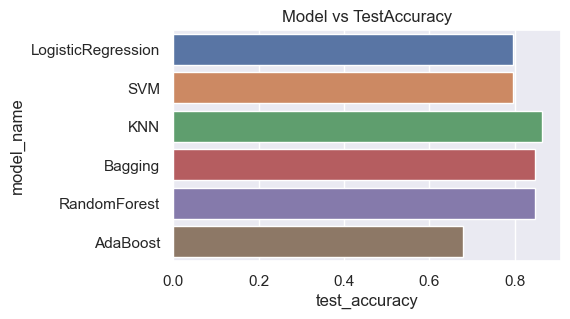

In [81]:
plt.figure(figsize = (5,3))
sns.barplot(x ="test_accuracy",y = "model_name",data=results_df)
plt.title("Model vs TestAccuracy")
plt.show()

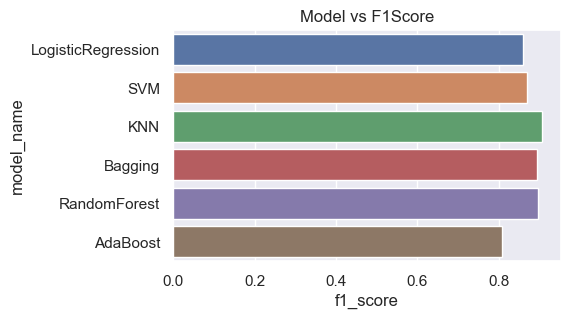

In [82]:
plt.figure(figsize = (5,3))
sns.barplot(x ="f1_score",y = "model_name",data=results_df)
plt.title("Model vs F1Score")
plt.show()

 Conclusion
 
 Best Model with respect to Accuracy/F1 Score/ Roc Score is Voting classifier which is the combination of three different classifier.
 
 But
 
 Since the Objective is mostly biased on health we do not want to take any chances in having Type II error. (False negative) which is predicting a disease infected person as healthy.
 
 Based on the above points we choose AdaBoost(with base estimator as SVC) as the best Model for prediction of parkinson disease.
